In [3]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt

## Extracting the dataset

In [4]:
zef_ref = zipfile.ZipFile('/content/archive (4).zip')
zef_ref.extractall()
zef_ref.close()
#zef

In [5]:
df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')

In [6]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
df.shape

(271116, 15)

In [8]:
df = df[df['Season'] == 'Summer']

In [9]:
df.shape

(222552, 15)

In [10]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN


In [11]:
region_df.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


In [12]:
df = df.merge(region_df,on='NOC',how='left')

In [13]:
df.tail(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222551,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,NaN


## Medal Tally

In [14]:
# Total country participated in a olympics
df['region'].unique().shape

(206,)

In [15]:
df.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9189
Height,51857
Weight,53854
Team,0
NOC,0
Games,0
Year,0


In [16]:
df.duplicated().sum()

np.int64(1385)

In [17]:
df = df.drop_duplicates()

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df['Medal'].value_counts()

,count
Medal,
Gold,11456
Bronze,11409
Silver,11212


In [20]:
df = pd.concat([df,pd.get_dummies(df['Medal'],dtype=float)],axis=1)

In [21]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0.0,0.0,0.0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0.0,0.0,0.0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0.0,0.0,0.0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0.0,0.0,0.0
222551,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,NaN,0.0,0.0,0.0


In [22]:
# Medal won by each country
# But this is not correct
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472.0,1333.0,1197.0
1,URS,832.0,635.0,596.0
2,GBR,635.0,729.0,620.0
3,GER,592.0,538.0,649.0
4,ITA,518.0,474.0,454.0
...,...,...,...,...
225,WIF,0.0,0.0,5.0
226,YEM,0.0,0.0,0.0
227,YAR,0.0,0.0,0.0
228,YMD,0.0,0.0,0.0


In [23]:
df[(df['NOC']=='IND') & (df['Medal']=='Gold')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0.0,1.0,0.0
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0.0,1.0,0.0
4460,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0.0,1.0,0.0
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0.0,1.0,0.0
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191759,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,0.0,1.0,0.0
193964,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0.0,1.0,0.0
193965,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0.0,1.0,0.0
205949,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,0.0,1.0,0.0


In [24]:
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [25]:
medal_tally.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0.0,0.0,0.0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0.0,0.0,0.0


In [26]:
medal_tally = medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [27]:
# This is correct informationo of medal won by each country
medal_tally.head(4)

,NOC,Gold,Silver,Bronze
0,USA,1035.0,802.0,708.0
1,URS,394.0,317.0,294.0
2,GBR,278.0,317.0,300.0
3,GER,235.0,261.0,283.0


In [28]:
# About India
medal_tally[medal_tally['NOC']=='IND']

,NOC,Gold,Silver,Bronze
50,IND,9.0,7.0,12.0


In [29]:
years = df['Year'].unique().tolist()

In [30]:
years.sort

<function list.sort(*, key=None, reverse=False)>

In [31]:
years.insert(0,'overall')

In [32]:
years

['overall',
 1992,
 2012,
 1920,
 1900,
 1932,
 1952,
 2000,
 1996,
 1912,
 1924,
 1948,
 2008,
 2016,
 2004,
 1984,
 1968,
 1972,
 1988,
 1936,
 1956,
 1960,
 1928,
 1976,
 1980,
 1964,
 1906,
 1904,
 1908,
 1896]

In [33]:
country = np.unique(df['region'].dropna().values).tolist()

In [34]:
country.sort()

In [35]:
country.insert(0,'overall')

In [36]:
country

['overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [37]:
medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [38]:
def fetch_meadal_tally(years, country):
    flag = 0

    # FILTERING PART
    if years == 'overall' and country == 'overall':
        temp_df = medal_df

    elif years == 'overall' and country != 'overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]

    elif years != 'overall' and country == 'overall':
        temp_df = medal_df[medal_df['Year'] == int(years)]

    elif years != 'overall' and country != 'overall':
        temp_df = medal_df[(medal_df['Year'] == int(years)) &
                           (medal_df['region'] == country)]

    # GROUPING PART
    if flag == 1:
        x = (temp_df.groupby('Year')
             .sum()[['Gold','Silver','Bronze']]
             .sort_values('Gold', ascending=False)
             .reset_index())
    else:
        x = (temp_df.groupby('region')
             .sum()[['Gold','Silver','Bronze']]
             .sort_values('Gold', ascending=False)
             .reset_index())

    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']
    print(x)

In [39]:
fetch_meadal_tally(years='1900',country='Angola')

Empty DataFrame
Columns: [region, Gold, Silver, Bronze, total]
Index: []


In [40]:
medal_df[(medal_df['Year']==1908) & (medal_df['region']=='India')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver


## Overall Analysis
* no. of editions
* no. of cities
* no. of events/sports
* no. of athletes
* participating nations

In [41]:
# no. of years
df['Year'].unique().shape[0] - 1

28

In [42]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0.0,0.0,0.0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0.0,0.0,0.0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0.0,0.0,0.0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0.0,1.0,0.0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0.0,0.0,0.0


In [43]:
df['City'].unique().shape

(23,)

In [44]:
df['Sport'].unique().shape

(52,)

In [45]:
df['Name'].unique().shape

(116122,)

In [46]:
df['region'].unique().shape

(206,)

In [47]:
df['Event'].unique().shape

(651,)

In [48]:
# Participating nations over time
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0.0,0.0,0.0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0.0,0.0,0.0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0.0,0.0,0.0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0.0,1.0,0.0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0.0,0.0,0.0


In [49]:
nations_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')

In [50]:
nations_over_time.head()

,Year,count
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22


In [51]:
import plotly.express as px

In [52]:
fig = px.line(nations_over_time,x='Year',y='count')
fig.show()

In [53]:
# Over the years how many events has conducted
events_over_time = df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('Year')

In [54]:
events_over_time.head()

,Year,count
28,1896,43
26,1900,90
25,1904,95
27,1906,74
23,1908,109


In [55]:
fig2 = px.line(events_over_time,x='Year',y='count')
fig2.show()

In [56]:
# In each sport how many events has occur in each year
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0.0,0.0,0.0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0.0,0.0,0.0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0.0,0.0,0.0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0.0,1.0,0.0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0.0,0.0,0.0


In [57]:
x = df.drop_duplicates(['Year','Sport','Event'])

<Axes: xlabel='Year', ylabel='Sport'>

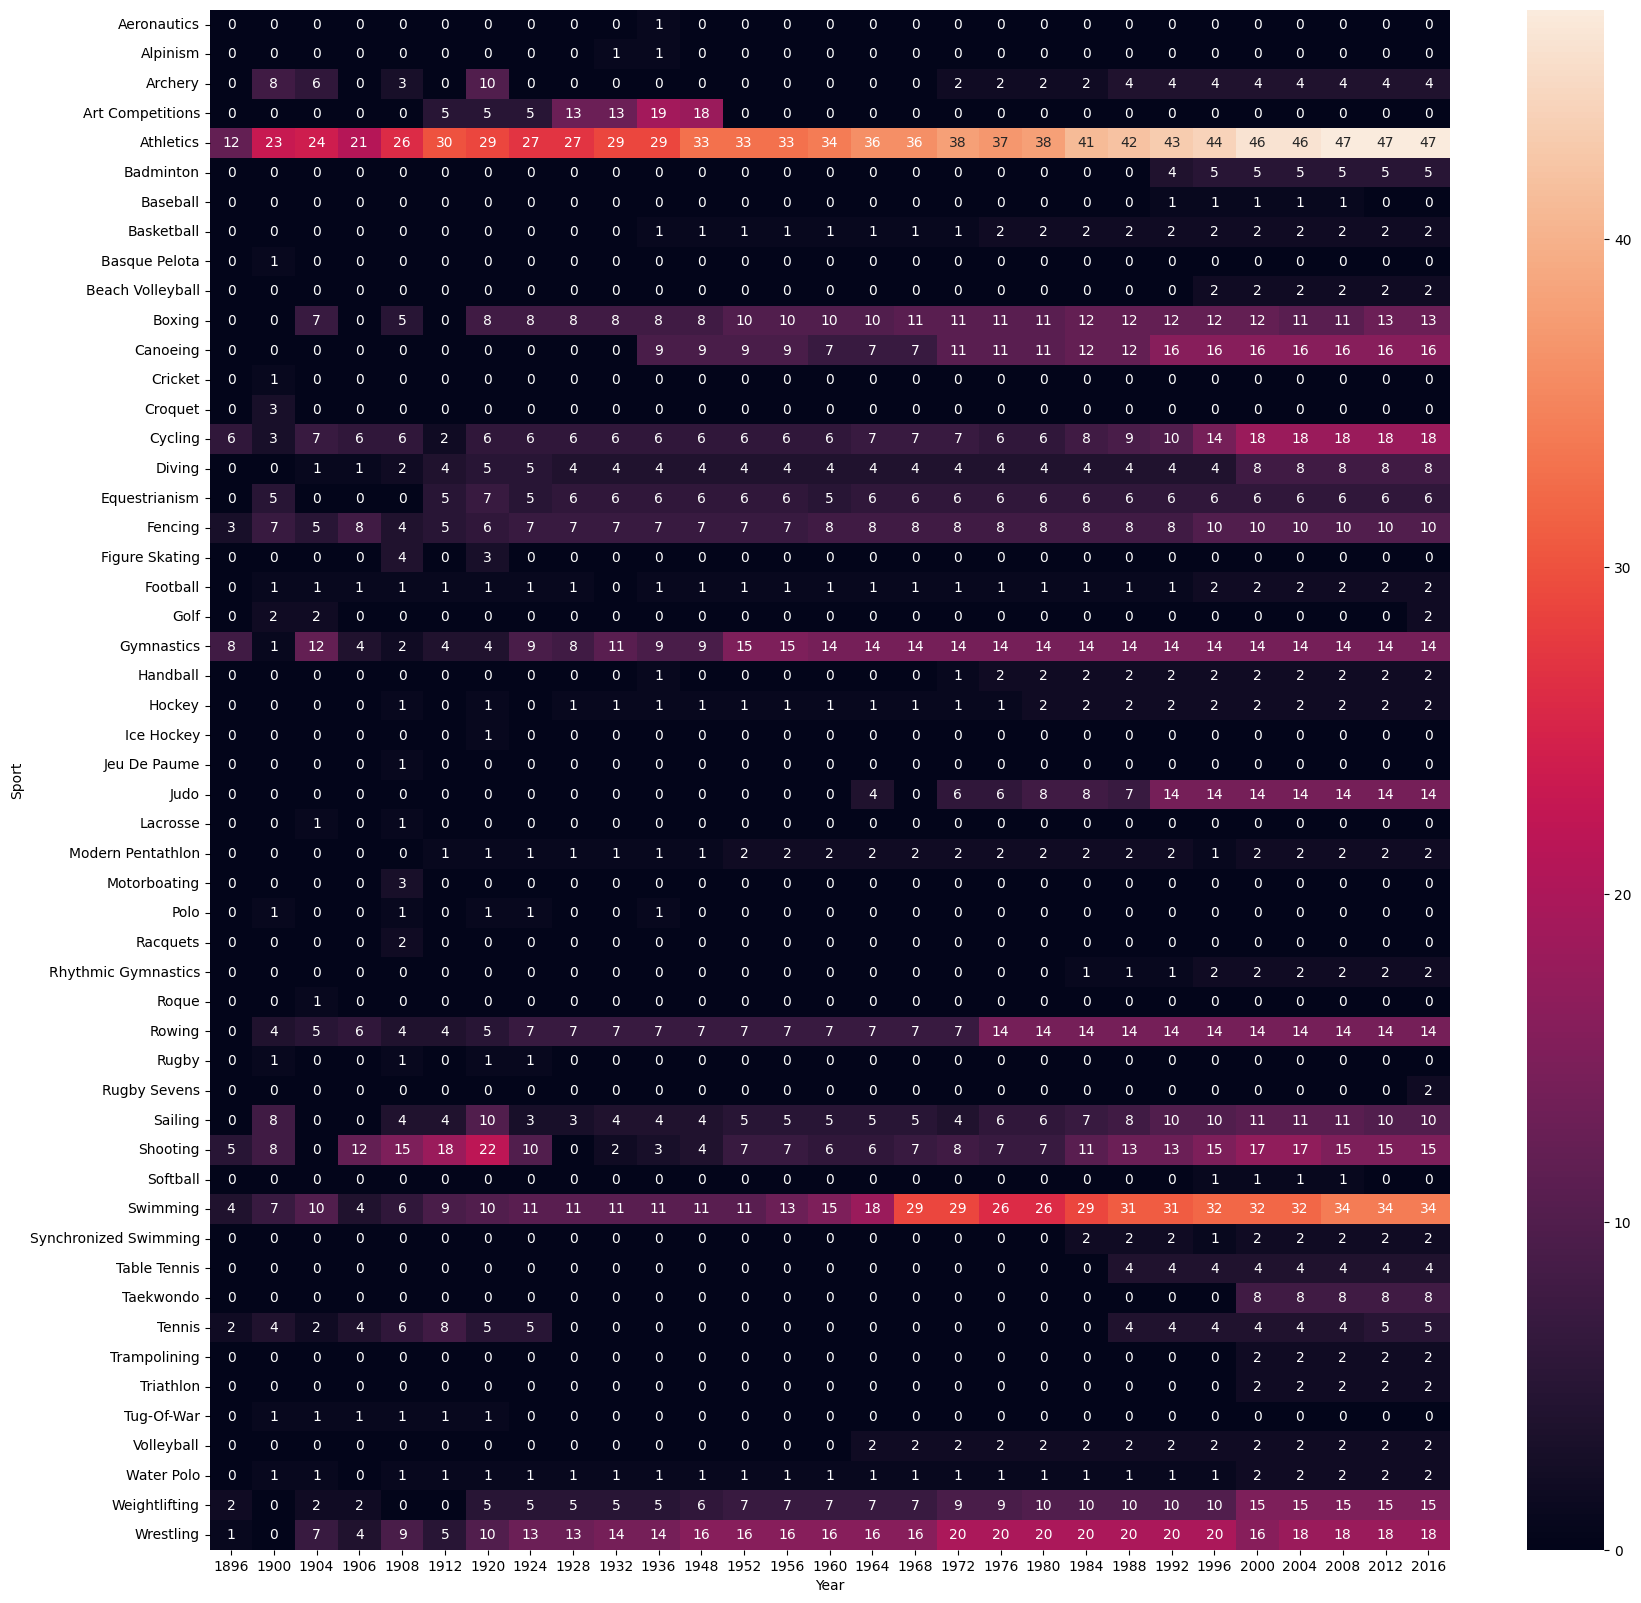

In [58]:
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

In [59]:
# Finding the top athletes in each sport with respect to their country
def best_athlete(df, Sport):
    temp_df = df.dropna(subset=['Medal'])

    if Sport != 'overall':
        temp_df = temp_df[temp_df['Sport'] == Sport]

    athlete_counts = temp_df['Name'].value_counts().reset_index()
    athlete_counts.columns = ['Name', 'Medal_Count']

    # merge back to get details (region, sport, etc.)
    result = athlete_counts.merge(df.drop_duplicates('Name'), on='Name', how='left')

    return result[['Name', 'Medal_Count', 'Sport', 'region']].head(10)


In [60]:
best_athlete(df,'Basketball')

,Name,Medal_Count,Sport,region
0,Teresa Edwards,5,Basketball,USA
1,Diana Lurena Taurasi,4,Basketball,USA
2,Sergey Aleksandrovich Belov,4,Basketball,Russia
3,"Suzanne Brigit ""Sue"" Bird",4,Basketball,USA
4,Lauren Elizabeth Jackson,4,Basketball,Australia
5,Lisa Deshawn Leslie (-Lockwood),4,Basketball,USA
6,Kristi Lee Harrower,4,Basketball,Australia
7,Tamika Devonne Catchings,4,Basketball,USA
8,Gennady Georgiyevich Volnov,4,Basketball,Russia
9,Carmelo Kyan Anthony,4,Basketball,USA


## Country wise analysis
* county wise medal tally per year(line plot)
* what country are good at (Heatmap)
* most successfull athlete(top 10)

In [61]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0.0,0.0,0.0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0.0,0.0,0.0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0.0,0.0,0.0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0.0,1.0,0.0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0.0,0.0,0.0


In [62]:
df = df.dropna(subset=["Medal"])
medal_tally_2 = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [63]:
new_df = medal_tally_2[medal_tally_2['region']=='India']
new_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [64]:
new_df.head()

,Year,Medal
0,1900,2
1,1928,1
2,1932,1
3,1936,1
4,1948,1


In [65]:
fig = px.line(new_df,x='Year',y='Medal')
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

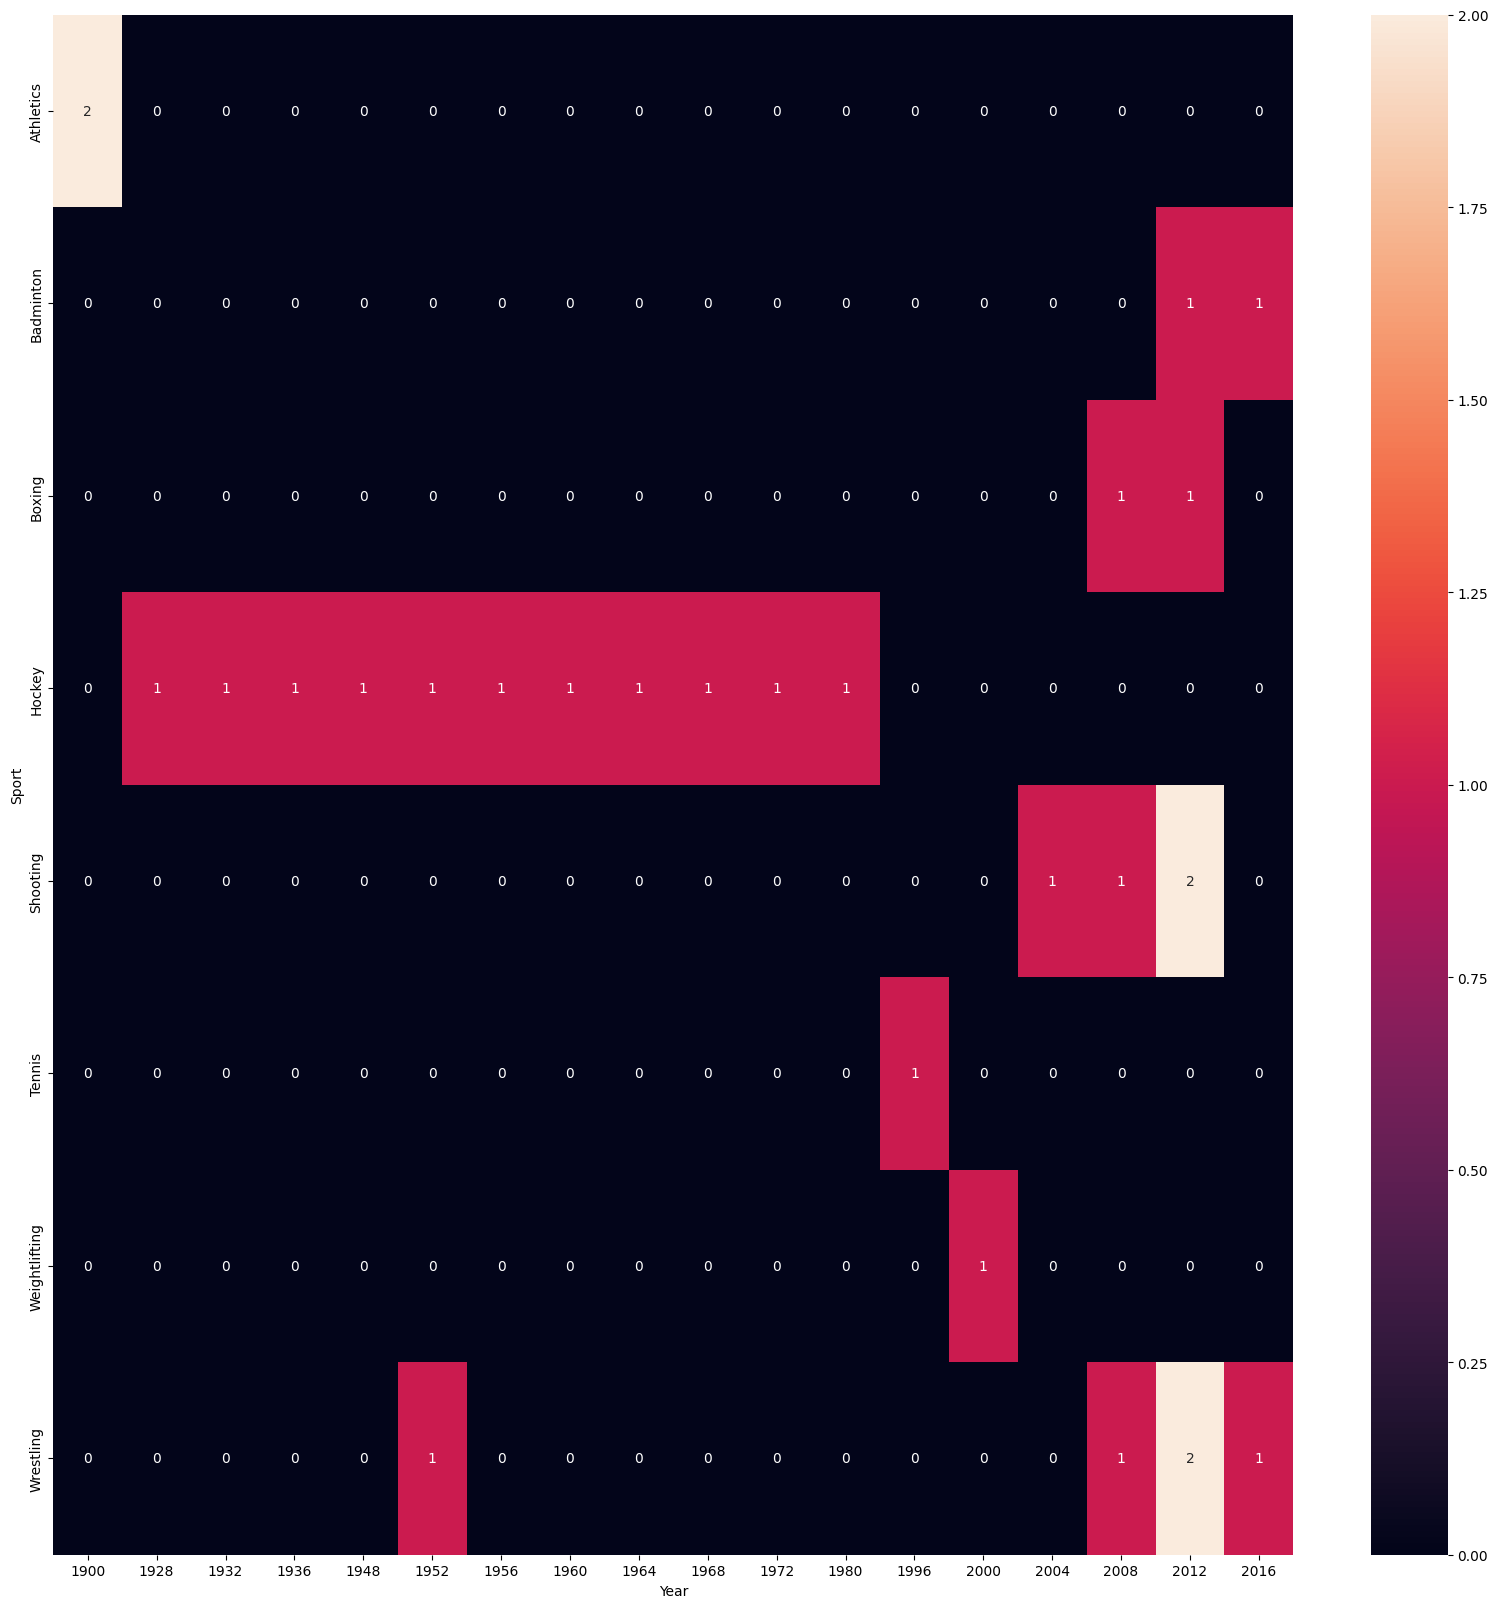

In [66]:
# Heatmap
plt.figure(figsize=(20,20))
new_df = medal_tally_2[medal_tally_2['region']=='India']
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0).astype(int),annot=True)

In [67]:
new_df = medal_tally_2[medal_tally_2['region']=='Antigua']
new_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver


In [68]:
medal_tally_2

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0.0,1.0,0.0
12,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN,1.0,0.0,0.0
13,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN,1.0,0.0,0.0
15,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN,1.0,0.0,0.0
16,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222486,135521,Anton Zwerina,M,23.0,NaN,66.0,Austria,AUT,1924 Summer,1924,Summer,Paris,Weightlifting,Weightlifting Men's Lightweight,Silver,Austria,NaN,0.0,0.0,1.0
222508,135535,Claudia Antoinette Zwiers,F,22.0,181.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Judo,Judo Women's Middleweight,Bronze,Netherlands,NaN,1.0,0.0,0.0
222526,135553,Galina Ivanovna Zybina (-Fyodorova),F,21.0,168.0,80.0,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,Gold,Russia,NaN,0.0,1.0,0.0
222528,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,0.0,0.0,1.0


In [69]:
medal_tally_2.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,254
Height,3283
Weight,3484
Team,0
NOC,0
Games,0
Year,0


In [70]:
# Best athelete country wise

def country_best_athlete(df, country):
    temp_df = df.dropna(subset=['Medal'])


    temp_df = temp_df[temp_df['region'] == country]

    athlete_counts = temp_df['Name'].value_counts().reset_index()
    athlete_counts.columns = ['Name', 'Medal_Count']

    # merge back to get details (region, sport, etc.)
    result = athlete_counts.merge(df.drop_duplicates('Name'), on='Name', how='left')

    return result[['Name', 'Medal_Count', 'Sport', 'region']].head(10)

In [71]:
country_best_athlete(df,'India')

,Name,Medal_Count,Sport,region
0,Leslie Walter Claudius,4,Hockey,India
1,Udham Singh Kular,4,Hockey,India
2,"Victor John ""V. J."" Peter",3,Hockey,India
3,Dhyan Chand Bais,3,Hockey,India
4,Richard James Allen,3,Hockey,India
5,Shankar Pillay Laxman,3,Hockey,India
6,Balbir Singh,3,Hockey,India
7,Harbinder Singh Chimni,3,Hockey,India
8,Prithipal Singh,3,Hockey,India
9,Ranganathan Francis,3,Hockey,India


## Athlete Wise Analysis
* Gold medal won wrt age
* how many male and female participate each year


In [74]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0.0,1.0,0.0
12,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN,1.0,0.0,0.0
13,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN,1.0,0.0,0.0
15,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN,1.0,0.0,0.0
16,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN,0.0,1.0,0.0


In [75]:
import plotly.figure_factory as ff

In [77]:
athlete_df = df.drop_duplicates(['Name','region'])

In [85]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal']=='Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna()

In [87]:
fig = ff.create_distplot([x1,x2,x3,x4],['Overall age','Gold','Silver','Bronze'],show_hist=False,show_rug=False)
fig.show()

In [93]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0.0,1.0,0.0
12,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN,1.0,0.0,0.0
13,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN,1.0,0.0,0.0
15,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN,1.0,0.0,0.0
16,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN,0.0,1.0,0.0


In [121]:
men_df = athlete_df[athlete_df['Sex']=='M'].groupby('Year').count()['Name'].reset_index()
female_df = athlete_df[athlete_df['Sex']=='F'].groupby('Year').count()['Name'].reset_index()

In [124]:
female_df.head()

,Year,Name
0,1900,8
1,1904,5
2,1906,5
3,1908,15
4,1912,25


In [126]:
final_df = men_df.merge(female_df,on='Year')

In [130]:
final_df = final_df.rename(columns={'Name_x':'Male','Name_y':'Female'})

In [131]:
final_df.head()

,Year,Male,Female
0,1900,459,8
1,1904,342,5
2,1906,332,5
3,1908,675,15
4,1912,672,25


In [132]:
px.line(final_df,x='Year',y=['Male','Female'])